## Assignment for Week 1 - Introduction to Machine Learning

UCI Riverside Heart Disease dataset
We will use the heart.disease.data file, which has 14 attributes and 1 target variable

Objectives:
* Impute missing data (don’t just throw it away)
  * '-9' means missing
* Look at the data with EDA
* Drop unnecessary columns, if needed, and defend your decision to do so.
* Deal with outliers (maybe make a boxplot)
* Provide a brief summary of how you prepared your data for future analysis.

Dataset Location:
http://archive.ics.uci.edu/ml/datasets/heart+Disease
(also provided in the assign_wk1.zip)

Deliverables:

Upload your notebook's .ipynb file
Your completed notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import zipfile
import os
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [3]:
# SET PATH TO DATA 
path = os.path.join('/content/drive/MyDrive/Colab Notebooks/Regis MSDS Notebooks/Machine Learning/assign_wk1.zip')

# UNZIP FILE AND STORE IN NEW DIRECTORY
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/Regis MSDS Notebooks/Machine Learning/Data/')

# SET NEW PATH FOR FILE IMPORT
filepath = os.path.join('/content/drive/MyDrive/Colab Notebooks/Regis MSDS Notebooks/Machine Learning/Data/assign_wk1/heart.disease.data')
df = pd.read_csv(filepath)

# Data at First Glance

In [4]:
df.head()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1
3,37,1,3,130,250,0,0,0,-9,1,0,187,0,3,0
4,41,0,2,130,204,0,0,0,-9,1,2,172,0,3,0


Summarizing the datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  num       282 non-null    int64
dtypes: int64(15)
memory usage: 33.2 KB


Describing the dataframe statistics

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,54.411348,0.677305,3.163121,131.563830,249.092199,16.460993,14.829787,0.148936,-8.184397,0.620567,1.014184,149.765957,0.326241,4.581560,0.907801
std,9.053083,0.468338,0.955405,17.757496,51.217546,19.580300,15.564563,0.356658,2.741802,0.486108,0.998118,22.923869,0.469670,2.248467,1.224894
min,29.000000,0.000000,1.000000,94.000000,126.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000,0.000000,71.000000,0.000000,-9.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,133.250000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.000000,10.000000,15.000000,0.000000,-9.000000,1.000000,2.000000,153.500000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,30.000000,30.000000,0.000000,-9.000000,1.000000,2.000000,165.750000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,99.000000,54.000000,1.000000,1.000000,1.000000,2.000000,202.000000,1.000000,7.000000,4.000000


# Impute Missing Values 

Given the missing values are hardcoded as -9, I replaced all values within the data with the respective mean of the column of which the value resides. I did this by creating a function to run by column with the `replace` method from Pandas to change the values

In [7]:
# Fill Missing Data w/ Mean

def fill_missing(dataframe): 
  for col in dataframe.columns: 
    mean = dataframe[col].mean() # calc the mean per each column
    for i in dataframe[col]:
      if i == -9:
         dataframe[col] = dataframe[col].replace(i, round(abs(mean),0))  # replace null values
  return dataframe

df = fill_missing(df)

# Testing out the code on the DM column, since it seemed to have more -9 values than otherwise
df.dm.value_counts()

8    259
1     23
Name: dm, dtype: int64

The DM column has a -9 value that skewed its average, so I'll quickly update the value to zero as it appears the other value is one and two distinct values were noted. If the values are 0 and 1, we could treat this as our outcome variable. 

In [8]:
df.dm = df.dm.replace(8, 0)

df.dm.value_counts()

0    259
1     23
Name: dm, dtype: int64

# Visualizing Distributions

<Figure size 1440x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

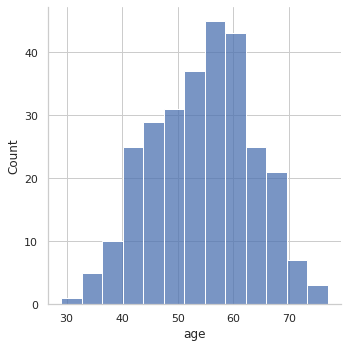

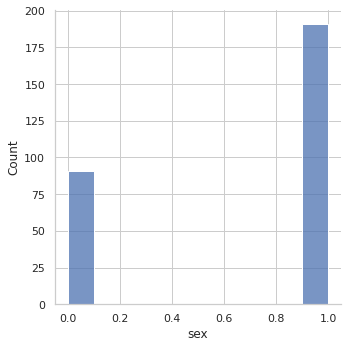

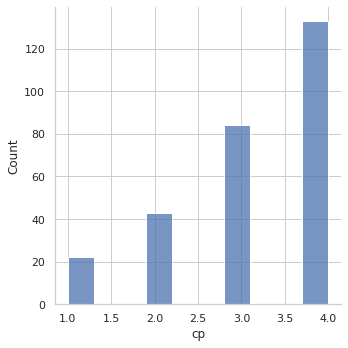

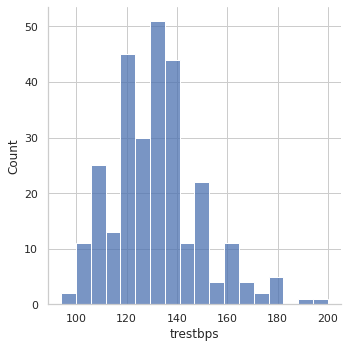

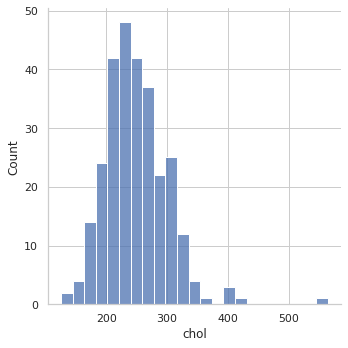

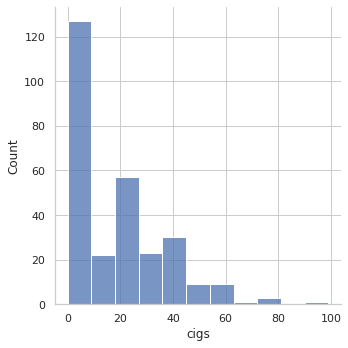

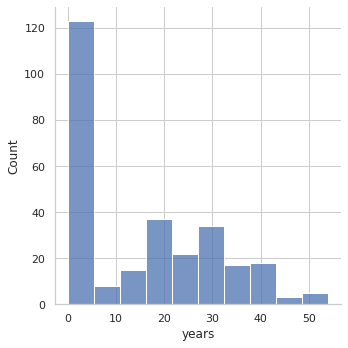

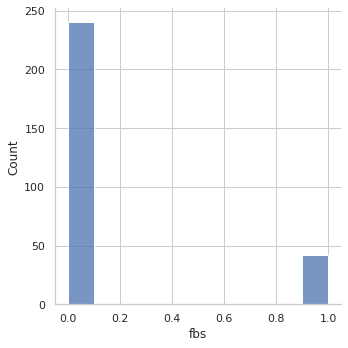

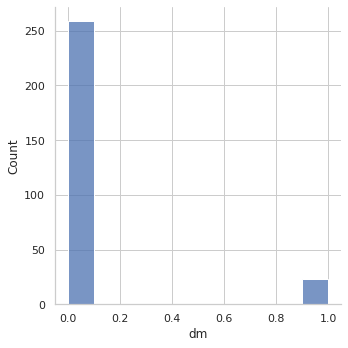

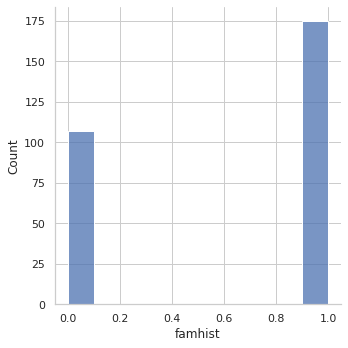

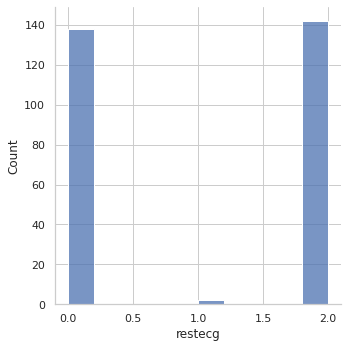

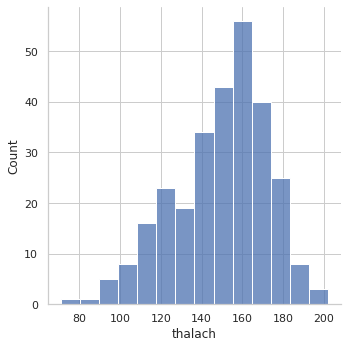

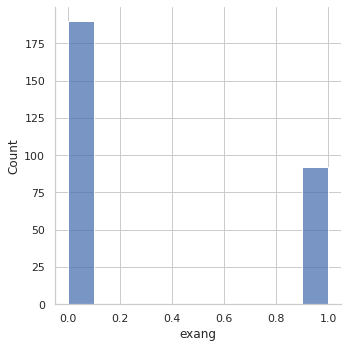

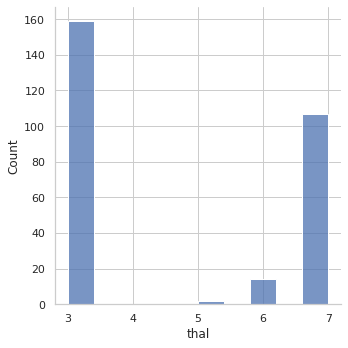

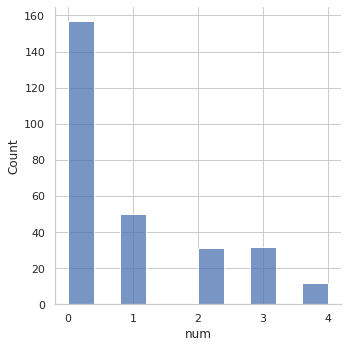

In [9]:
sns.set(style="whitegrid")  
fig=plt.figure(figsize=(20,20))
for i, name in enumerate(df.columns.values): 
    plt.figure(i)
    sns.displot(df[name])
fig.tight_layout()

Among the distributions, not many appear to be normal and the only true normal distribution appears to be age. This may mean that many of these columns will need to be encoded or transformed for better performance depending upon the model selected. 

# Outliers 

When viewing outliers, I use a boxplot for each feature to best understand the points that appear outside of the interquartile range of the data to eliminate them and smooth the data. 

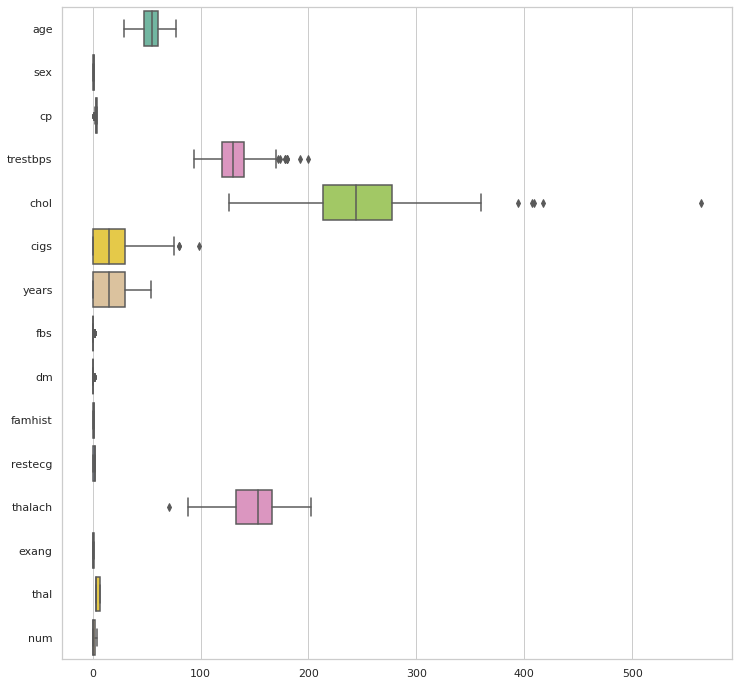

In [10]:
fig = plt.figure(figsize=(12,12))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

Outliers exist among Cholesterol (`chol`) as a feature mostly, with some cases of outliers in Cigarettes per Day (`cigs`) and Resting Blood Pressure (`trestbps`)

In [11]:
# CALCULATING IQR, USING IT TO DETERMINE IF A VALUE IS OUT OF BOUNDS AND THEREFORE AN OUTLIER
def outlier_detect(col: str):
  q1 = np.percentile(df[f'{col}'], 25)
  q3 = np.percentile(df[f'{col}'], 75)
  IQR = q3-q1
  lower = q1-(1.5*IQR)
  upper = q3 + (1.5*IQR)
  
  result = [i for i in df[f'{col}'] if i < lower or i > upper]
  return result 

# CALCULATE OUTLIER VALUES FOR EACH COLUMN 
def find_outliers(df): 
  for col in df.columns.values: 
     print(f'Column {col}: {outlier_detect(col)}')

In [12]:
# USE THE FIND OUTLIERS FUNCTION TO PRINT ALL OUTLIERS FOR EACH FEATURE
find_outliers(df)

Column age: []
Column sex: []
Column cp: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Column trestbps: [172, 180, 200, 174, 178, 192, 180, 178, 180]
Column chol: [417, 407, 564, 394, 409]
Column cigs: [99, 80, 80]
Column years: []
Column fbs: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Column dm: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Column famhist: []
Column restecg: []
Column thalach: [71]
Column exang: []
Column thal: []
Column num: []


In [13]:
# REMOVE OUTLIERS FROM COLUMNS WITH IMPACTING AMOUNT. 
# NOT REMOVING VALUES "1" DUE TO BINARY TYPE

# df['chol'].drop(outlier_detect('chol'), inplace=True)
# df['trestbps'].drop(outlier_detect('trestbps'), inplace=True)
# df['cigs'].drop(outlier_detect('cigs'), inplace=True)
# df['thalach'].drop(outlier_detect('thalach'), inplace=True)

def drop_outliers(df, col):
  check = [i for i in df[f'{col}'] if i in outlier_detect(f'{col}')]
  df = df[f'{col}'].drop([i for i in check if i in df[f'{col}']])

drop_outliers(df, 'chol')
drop_outliers(df, 'trestbps')
drop_outliers(df, 'cigs')
drop_outliers(df, 'thalach')

df[df['chol'] == '407']  # test

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num


# Conclusion

No columns needed to be dropped due to their impact upon the data without significant testing to determine their impact. Moving forward in further analysis, I would plot correlations and likely see how important each column/feature is toward the data and make comparisons among them to understand the variance. The outliers were removed from the data, though distributions seem rather skewed still, which is most in part to boolean data (Yes/No, True/False, 1/0). 